In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from datetime import datetime
from __future__ import division
df = pd.read_csv('Project_Airtel.csv')

In [3]:
df['Vol.'] = df['Vol.']/1000

In [4]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 29, 2021",553.60,578.5,578.50,550.60,25050.0,-3.03%
1,"Jan 28, 2021",570.90,566.5,575.85,562.75,14920.0,0.02%
2,"Jan 27, 2021",570.80,580.0,581.75,562.35,15280.0,-1.71%
3,"Jan 25, 2021",580.75,579.0,587.85,569.55,12270.0,0.68%
4,"Jan 22, 2021",576.85,583.9,585.55,572.75,12430.0,-0.77%
...,...,...,...,...,...,...,...
56,"Nov 06, 2020",449.90,457.0,460.35,448.75,11970.0,-1.62%
57,"Nov 05, 2020",457.30,457.0,461.90,452.60,9230.0,0.94%
58,"Nov 04, 2020",453.05,453.0,455.55,447.15,10000.0,-0.34%
59,"Nov 03, 2020",454.60,458.0,460.70,447.45,16040.0,-0.61%


In [5]:
df['Date'] = pd.to_datetime(df.Date)

In [6]:
df2 = df[["Date","Price","Open","High","Low", "Vol."]]
df2 = df2.loc[:,["Date","Price","Open","High","Low", "Vol."]]

In [7]:
df2 = df2.set_index("Date")
df2

,Price,Open,High,Low,Vol.
Date,,,,,
2021-01-29,553.60,578.5,578.50,550.60,25050.0
2021-01-28,570.90,566.5,575.85,562.75,14920.0
2021-01-27,570.80,580.0,581.75,562.35,15280.0
2021-01-25,580.75,579.0,587.85,569.55,12270.0
2021-01-22,576.85,583.9,585.55,572.75,12430.0
...,...,...,...,...,...
2020-11-06,449.90,457.0,460.35,448.75,11970.0
2020-11-05,457.30,457.0,461.90,452.60,9230.0
2020-11-04,453.05,453.0,455.55,447.15,10000.0


In [8]:
df2.describe()

,Price,Open,High,Low,Vol.
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,512.195082,513.107377,519.311475,504.392623,17847.213115
std,42.236600,44.467088,44.103445,42.305210,11694.235493
min,449.900000,435.000000,455.550000,435.000000,8270.000000
25%,478.600000,477.000000,483.200000,471.100000,11610.000000
50%,505.150000,507.000000,511.200000,499.100000,14510.000000
75%,540.250000,532.000000,549.750000,527.100000,19650.000000
max,602.650000,609.550000,610.650000,593.800000,83670.000000


<AxesSubplot:xlabel='Date'>

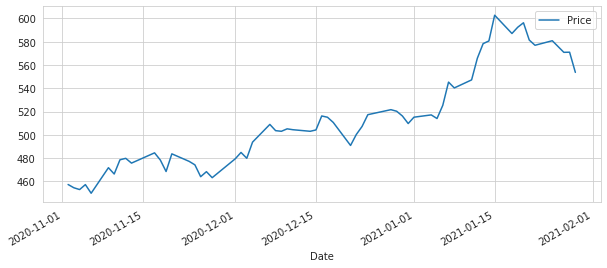

In [9]:
df2['Price'].plot(legend = True,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

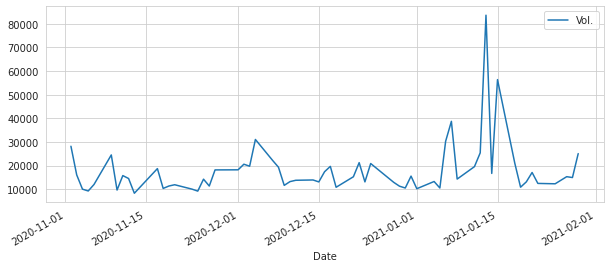

In [10]:
df2['Vol.'].plot(legend = True, figsize = (10,4))

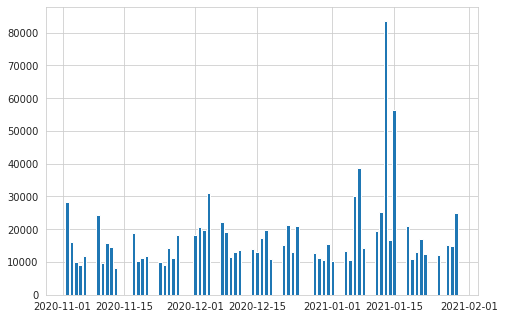

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.Date,df['Vol.'])
plt.show()